# Lab 7: Word Sequences
## Introduction to Human Language Technologies
### Victor Badenas Crespo

***

## Statement:

- Consider the following sentence: `Lazy cats play with mice`.
- Expand the grammar of the example related to non-probabilistic chart parsers in order to subsume this new sentence.
- Perform the constituency parsing using a BottomUpChartParser, a BottomUpLeftCornerChartParser and a LeftCornerChartParser.
- For each one of them, provide the resulting tree, the number of edges and the list of explored edges.
- Which parser is the most efficient for parsing the sentence?
- Which edges are filtered out by each parser and why?

***

## Solution

In [1]:
import nltk
from nltk import CFG, ChartParser
from nltk import BottomUpChartParser, BottomUpLeftCornerChartParser, LeftCornerChartParser

In [2]:
grammar = CFG.fromstring('''
  S   -> NP VP NP
  NP  -> NNS | JJ NNS | NP CC NP
  VP  -> VV CC | VV
  NNS -> "cats" | "dogs" | "mice" | NNS CC NNS
  JJ  -> "big" | "small" | "Lazy"
  CC  -> "and" | "or" | "with"
  VV  -> "play"
  ''')
print(grammar)

Grammar with 17 productions (start state = S)
    S -> NP VP NP
    NP -> NNS
    NP -> JJ NNS
    NP -> NP CC NP
    VP -> VV CC
    VP -> VV
    NNS -> 'cats'
    NNS -> 'dogs'
    NNS -> 'mice'
    NNS -> NNS CC NNS
    JJ -> 'big'
    JJ -> 'small'
    JJ -> 'Lazy'
    CC -> 'and'
    CC -> 'or'
    CC -> 'with'
    VV -> 'play'


In [3]:
sentence = "Lazy cats play with mice"
# sentence = "with mice"
words = nltk.word_tokenize(sentence)
print(words)

['Lazy', 'cats', 'play', 'with', 'mice']


In [4]:
parser = ChartParser(grammar)
parse = parser.parse(words)

In [5]:
ts = []
for t in parse:
    ts.append(t)
print('number of trees:', len(ts))

number of trees: 1


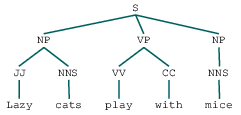

In [6]:
ts[0]

In [7]:
bottomUpChartParser = BottomUpChartParser(grammar)
bottomUpChartParserparse = bottomUpChartParser.parse(words)
bottomUpChartTrees = [t for t in bottomUpChartParserparse]
print(f"bottomUpChartParser has {len(bottomUpChartTrees)}")

bottomUpChartParser has 1


bottomUpChart num edges =  49


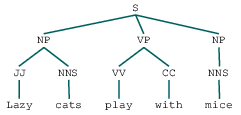

In [8]:
print("bottomUpChart num edges = ", bottomUpChartParser.chart_parse(words).num_edges())
bottomUpChartTrees[0]

In [9]:
bottomUpLeftCornerChartParser = BottomUpLeftCornerChartParser(grammar)
bottomUpLeftCornerChartParserparse = bottomUpLeftCornerChartParser.parse(words)
bottomUpLeftCornerChartTrees = [t for t in bottomUpLeftCornerChartParserparse]
print(f"bottomUpLeftCornerChartParser has {len(bottomUpLeftCornerChartTrees)}")

bottomUpLeftCornerChartParser has 1


bottomUpLeftCornerChart num edges =  31


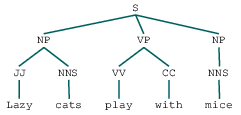

In [10]:
print("bottomUpLeftCornerChart num edges = ", bottomUpLeftCornerChartParser.chart_parse(words).num_edges())
bottomUpLeftCornerChartTrees[0]

In [11]:
leftCornerChartParser = LeftCornerChartParser(grammar)
leftCornerChartParserparse = leftCornerChartParser.parse(words)
leftCornerChartTrees = [t for t in leftCornerChartParserparse]
print(f"leftCornerChartParser has {len(leftCornerChartTrees)}")

leftCornerChartParser has 1


leftCornerChart num edges =  23


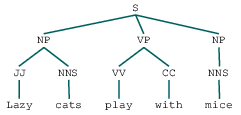

In [12]:
print("leftCornerChart num edges = ", leftCornerChartParser.chart_parse(words).num_edges())
leftCornerChartTrees[0]

***
## Conclusion

- _BottomUpChartParser:_ 49 -> does not filter any edges
- _BottomUpLeftCornerChartParser:_ 31 -> bottom-up strategy filtering out edges without any word subsumtion
- _LeftCornerChartParser:_ 23 -> bottom-up strategy filtering out edges without new word subsumptions

LeftCornerChartParser is the best parsing the sentence as the number of edges that has to explore is the smallest of the 3.

In [13]:
bottomUpChartEdges = bottomUpChartParser.chart_parse(words)._edge_to_cpls
bottomUpLeftCornerChartEdges = bottomUpLeftCornerChartParser.chart_parse(words)._edge_to_cpls
leftCornerChartEdges = leftCornerChartParser.chart_parse(words)._edge_to_cpls

In [14]:
bottomUpChartEdges

{[Edge: [0:1] 'Lazy']: {(): True},
 [Edge: [1:2] 'cats']: {(): True},
 [Edge: [2:3] 'play']: {(): True},
 [Edge: [3:4] 'with']: {(): True},
 [Edge: [4:5] 'mice']: {(): True},
 [Edge: [0:0] JJ -> * 'Lazy']: {(): True},
 [Edge: [0:1] JJ -> 'Lazy' *]: {([Edge: [0:1] 'Lazy'],): True},
 [Edge: [0:0] NP -> * JJ NNS]: {(): True},
 [Edge: [0:1] NP -> JJ * NNS]: {([Edge: [0:1] JJ -> 'Lazy' *],): True},
 [Edge: [1:1] NNS -> * 'cats']: {(): True},
 [Edge: [1:2] NNS -> 'cats' *]: {([Edge: [1:2] 'cats'],): True},
 [Edge: [1:1] NP -> * NNS]: {(): True},
 [Edge: [1:1] NNS -> * NNS CC NNS]: {(): True},
 [Edge: [0:2] NP -> JJ NNS *]: {([Edge: [0:1] JJ -> 'Lazy' *],
   [Edge: [1:2] NNS -> 'cats' *]): True},
 [Edge: [1:2] NP -> NNS *]: {([Edge: [1:2] NNS -> 'cats' *],): True},
 [Edge: [1:2] NNS -> NNS * CC NNS]: {([Edge: [1:2] NNS -> 'cats' *],): True},
 [Edge: [1:1] S  -> * NP VP NP]: {(): True},
 [Edge: [1:1] NP -> * NP CC NP]: {(): True},
 [Edge: [1:2] S  -> NP * VP NP]: {([Edge: [1:2] NP -> NNS *],):

In [15]:
bottomUpLeftCornerChartEdges

{[Edge: [0:1] 'Lazy']: {(): True},
 [Edge: [1:2] 'cats']: {(): True},
 [Edge: [2:3] 'play']: {(): True},
 [Edge: [3:4] 'with']: {(): True},
 [Edge: [4:5] 'mice']: {(): True},
 [Edge: [0:1] JJ -> 'Lazy' *]: {([Edge: [0:1] 'Lazy'],): True},
 [Edge: [0:1] NP -> JJ * NNS]: {([Edge: [0:1] JJ -> 'Lazy' *],): True},
 [Edge: [1:2] NNS -> 'cats' *]: {([Edge: [1:2] 'cats'],): True},
 [Edge: [1:2] NP -> NNS *]: {([Edge: [1:2] NNS -> 'cats' *],): True},
 [Edge: [1:2] NNS -> NNS * CC NNS]: {([Edge: [1:2] NNS -> 'cats' *],): True},
 [Edge: [0:2] NP -> JJ NNS *]: {([Edge: [0:1] JJ -> 'Lazy' *],
   [Edge: [1:2] NNS -> 'cats' *]): True},
 [Edge: [0:2] S  -> NP * VP NP]: {([Edge: [0:2] NP -> JJ NNS *],): True},
 [Edge: [0:2] NP -> NP * CC NP]: {([Edge: [0:2] NP -> JJ NNS *],): True},
 [Edge: [1:2] S  -> NP * VP NP]: {([Edge: [1:2] NP -> NNS *],): True},
 [Edge: [1:2] NP -> NP * CC NP]: {([Edge: [1:2] NP -> NNS *],): True},
 [Edge: [2:3] VV -> 'play' *]: {([Edge: [2:3] 'play'],): True},
 [Edge: [2:3] VP 

In [16]:
leftCornerChartEdges

{[Edge: [0:1] 'Lazy']: {(): True},
 [Edge: [1:2] 'cats']: {(): True},
 [Edge: [2:3] 'play']: {(): True},
 [Edge: [3:4] 'with']: {(): True},
 [Edge: [4:5] 'mice']: {(): True},
 [Edge: [0:1] JJ -> 'Lazy' *]: {([Edge: [0:1] 'Lazy'],): True},
 [Edge: [0:1] NP -> JJ * NNS]: {([Edge: [0:1] JJ -> 'Lazy' *],): True},
 [Edge: [1:2] NNS -> 'cats' *]: {([Edge: [1:2] 'cats'],): True},
 [Edge: [1:2] NP -> NNS *]: {([Edge: [1:2] NNS -> 'cats' *],): True},
 [Edge: [0:2] NP -> JJ NNS *]: {([Edge: [0:1] JJ -> 'Lazy' *],
   [Edge: [1:2] NNS -> 'cats' *]): True},
 [Edge: [0:2] S  -> NP * VP NP]: {([Edge: [0:2] NP -> JJ NNS *],): True},
 [Edge: [1:2] S  -> NP * VP NP]: {([Edge: [1:2] NP -> NNS *],): True},
 [Edge: [2:3] VV -> 'play' *]: {([Edge: [2:3] 'play'],): True},
 [Edge: [2:3] VP -> VV * CC]: {([Edge: [2:3] VV -> 'play' *],): True},
 [Edge: [2:3] VP -> VV *]: {([Edge: [2:3] VV -> 'play' *],): True},
 [Edge: [3:4] CC -> 'with' *]: {([Edge: [3:4] 'with'],): True},
 [Edge: [2:4] VP -> VV CC *]: {([Edge

***